* Group 5 - Joyce Njeri, Kenneth Kipkirui, Brian Bett, Innocent Mbuvi, Michelle Nyaanga
* Instructor name: Nikita Njoroge

# Business Understanding

## Overview / Background 
The real estate market is experiencing unpredictable fluctuations in property prices. This makes it hard for prospective investors to make decisions while deciding on which properties to invest in.

## Research Question
The study aims to investigate : 

What are the top 5 best zip code areas for the American Properties Corportation to invest in?

### Stakeholder
The primary party involved in this project is **American Properties Corporation (APC)**, a real estate company. APC is a newcomer to the industry and is seeking accurate information regarding the performance of the real estate market over the years.  

The subsequent groups within the organization are particularly invested in the results of the project:
 * Top_level Management
 * Real Estate Sales Managers


# Problem Statement
The real estate market is experiencing unpredictable fluctuations in property prices. This uncertainty makes it difficult for prospective investors to make informed decisions about investing in property. The company needs to find an informed way to decide on which properties to invest in.

### Proposed Solution
To better understand the factors that influence house sales and forecast future trends, a comprehensive analysis using a predictive timeseries model is required. This model will analyze historical data and will allow prospective investors, such as The American Properties Corporation to  make informed decisions on which properties to invest in.

# Objectives

1. To analyze the zillow housing dataset, identify key patterns, trends and relatioships in the data and yeild visualizations that will aid in data-driven decisions.

1. To develop a predictive timeseries model that will forecast return on investment(ROI) of the various Zip codes.

1. To provide recommendations on factors to consider in order invest in property.




# Data Understanding 

## Data Sources

This study makes use of the Zillow House data that is contained in a CSV file, "zillow_data.csv". 

In [25]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
#Time series analysis tools.
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv("Data/zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.shape

(14723, 272)

In [4]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

The dataset consists of various columns including region information and monthly real estate prices from April 1996 to April 2018. 
The columns are:
- RegionID: Identifier for the region
- RegionName: Zip code
- City: City name
- State: State abbreviation
- Metro: Metropolitan area
- CountyName: County name
- SizeRank: Rank based on size
- Date columns that run from  1996-04 to 2018-04: Real estate prices for each month

# Data Preparation

## Data Cleaning

In this stage the data undergoes cleaning and  preparation which involves checking for null values , dropping and renaming columns and converting column names to date time

### Check missing values

In [6]:
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types

(RegionID         0
 RegionName       0
 City             0
 State            0
 Metro         1043
               ... 
 2017-12          0
 2018-01          0
 2018-02          0
 2018-03          0
 2018-04          0
 Length: 272, dtype: int64,
 RegionID       int64
 RegionName     int64
 City          object
 State         object
 Metro         object
                ...  
 2017-12        int64
 2018-01        int64
 2018-02        int64
 2018-03        int64
 2018-04        int64
 Length: 272, dtype: object)

The 'Metro' column has 1043 missing values, as it is not as important we will drop it.

In [7]:
df_cleaned = df.drop(columns=['Metro'])
df_cleaned.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Convert Date Columns

In [8]:
# Convert date columns to datetime format
df_columns = df_cleaned.columns[7:]
df_cleaned[df_columns] = df_cleaned[df_columns].apply(pd.to_numeric, errors='coerce')

# Display data types, see if date columns are numeric
df_cleaned.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
CountyName    object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 271, dtype: object

## 2. Exploratory Data Analysis

We perform EDA to understand data distributions and trends. This will be done through univariate and bivariate analysis. The Analysis will include: State Distribution, Current Average Median House Price by State, Average Median House Price vs Time, Return on Investment(ROI) vs City and ROI in Different Timeframes per City

#### Univariate Analysis

##### State Distribution

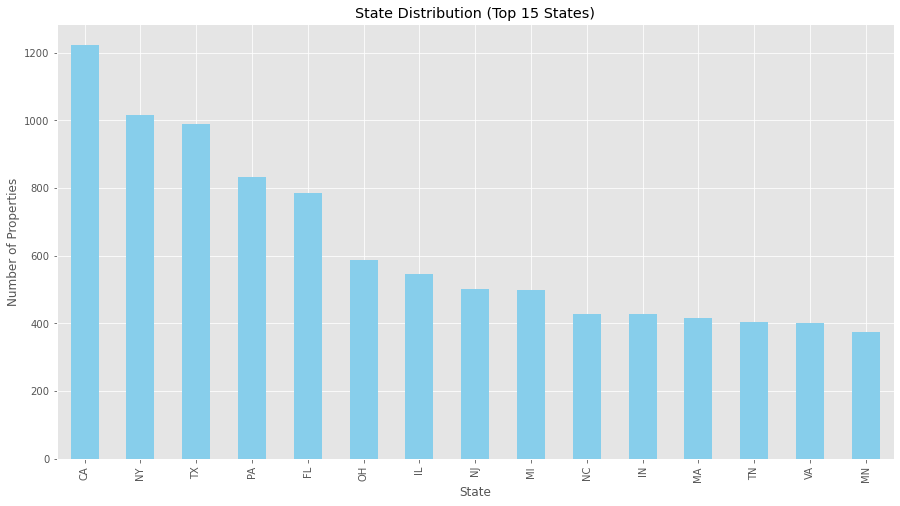

In [9]:
# Get the top 15 states by the number of properties
top_states = df_cleaned['State'].value_counts().nlargest(15).index
data_top_states = df_cleaned[df_cleaned['State'].isin(top_states)]

# State Distribution
state_distribution_top = data_top_states['State'].value_counts()

plt.figure(figsize=(15, 8))
state_distribution_top.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.title('State Distribution (Top 15 States)')
plt.show()

The bar plot reveals that California (CA) has the highest number of properties, surpassing 1200, indicating a dominant real estate market presence. New York (NY) and Texas (TX) follow closely with property counts near 1100, suggesting robust real estate activities in these states as well. Pennsylvania (PA) and Florida (FL) also show significant property counts in the 800-1000 range. These findings highlight California's leading position, strong markets in NY and TX, and moderate to significant real estate activity in other states, reflecting diverse market dynamics and potential areas for further real estate investment analysis.

##### Current Average Median House Price by State

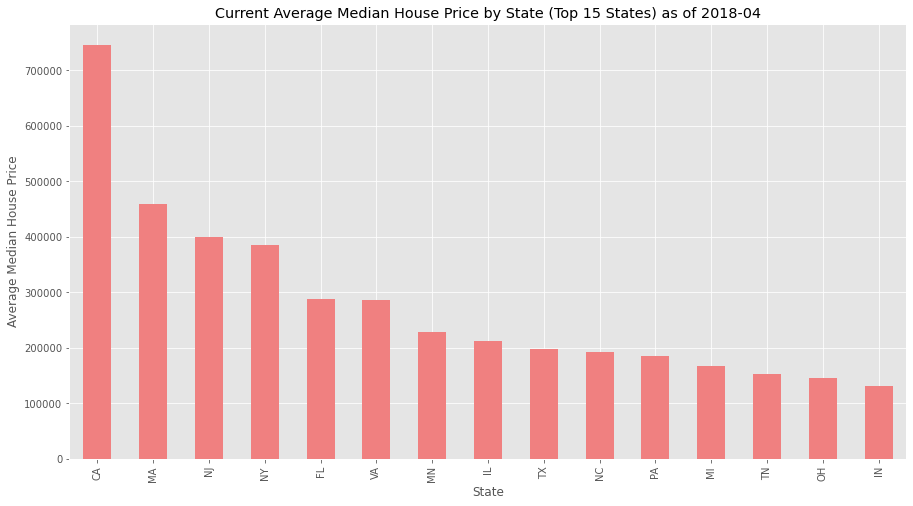

In [10]:
# Calculate the average median house price by state for the most recent date
latest_date = df_cleaned.columns[-1]
avg_median_price_by_state_top = data_top_states.groupby('State')[latest_date].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
avg_median_price_by_state_top.plot(kind='bar', color='lightcoral')
plt.xlabel('State')
plt.ylabel('Average Median House Price')
plt.title(f'Current Average Median House Price by State (Top 15 States) as of {latest_date}')
plt.show()


California boasts the highest average median house price, significantly surpassing all other states. Massachusetts and New Jersey follow closely behind, while states like Ohio and Indiana exhibit notably lower average median house prices. This data underscores the substantial disparity in housing costs across different regions of the United States.

#### Bivariate Analysis

##### Average Median House Price vs Time

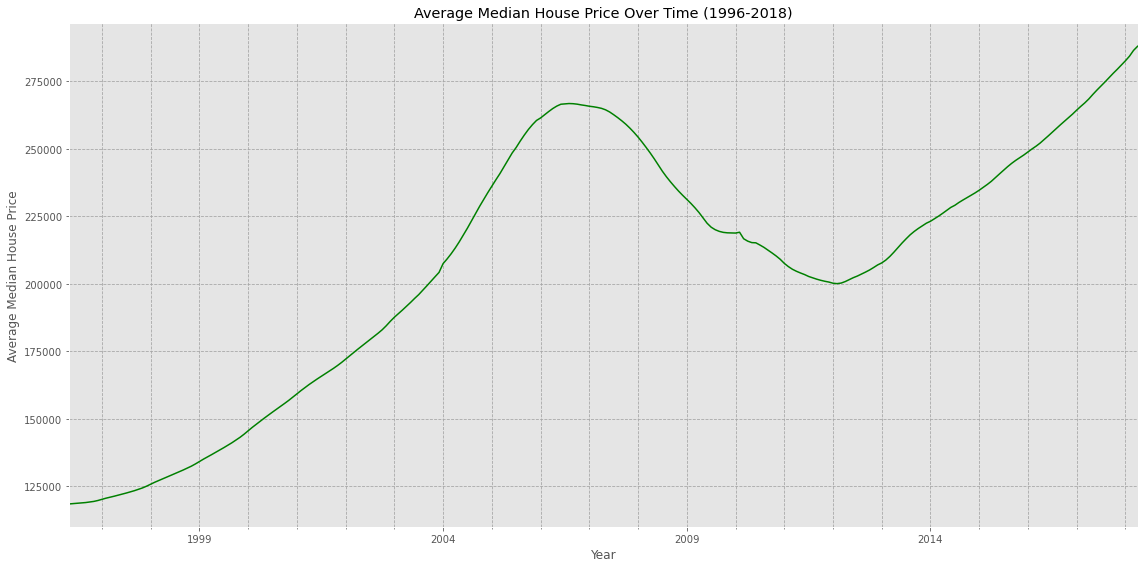

In [11]:
# Extracting all the monthly columns
monthly_columns = df_cleaned.columns[7:271]  # Adjust indices if needed

# Calculating the average median house price for each month
average_monthly_prices = df_cleaned[monthly_columns].mean()

# Convert the monthly columns to datetime
average_monthly_prices.index = pd.to_datetime(average_monthly_prices.index, format='%Y-%m')

# Plotting the average median house price over time
plt.figure(figsize=(16, 8))
average_monthly_prices.plot(color='green')
plt.title('Average Median House Price Over Time (1996-2018)')
plt.xlabel('Year')
plt.ylabel('Average Median House Price')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()




The prices generally increased over time, with a significant peak around 2006 followed by a sharp decline. After a period of fluctuation, the prices resumed an upward trend from 2012 onwards.

##### Return on Investment(ROI) vs City

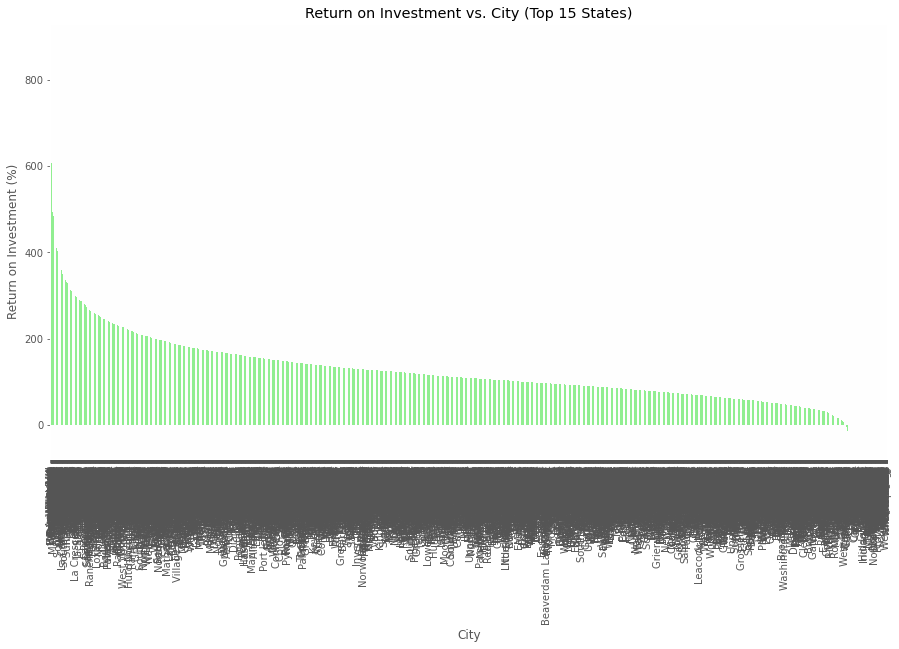

In [12]:
# Calculate Return on Investment (ROI) for each city in the top 15 states
initial_date = df_cleaned.columns[7]
roi_by_city_top = (data_top_states[latest_date] - data_top_states[initial_date]) / data_top_states[initial_date] * 100
roi_by_city_top = roi_by_city_top.groupby(data_top_states['City']).mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
roi_by_city_top.plot(kind='bar', color='lightgreen')
plt.xlabel('City')
plt.ylabel('Return on Investment (%)')
plt.title('Return on Investment vs. City (Top 15 States)')
plt.show()


##### Return on Investment in Different Timeframes per City

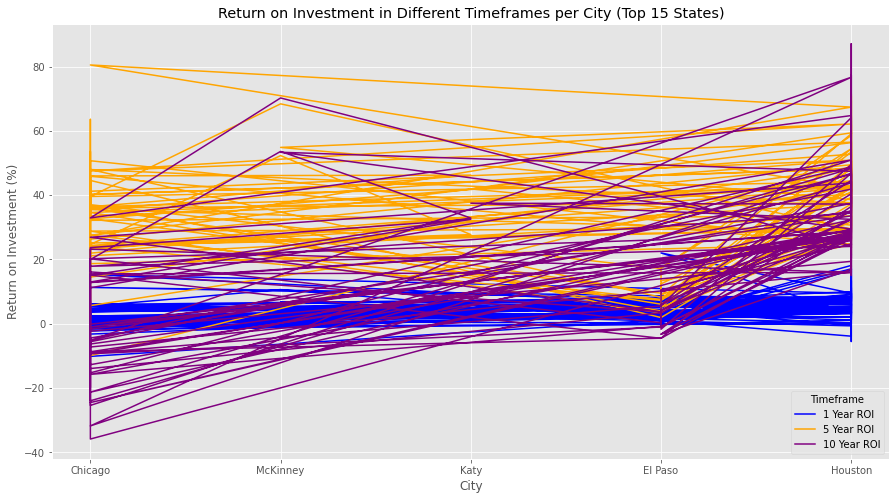

In [13]:
# Select a few cities for analysis
sample_cities = data_top_states['City'].unique()[:5]
sample_data_cities = data_top_states[data_top_states['City'].isin(sample_cities)]

# Calculate ROI for different timeframes
timeframes = [1, 5, 10]  # Years
roi_timeframes = {}

for years in timeframes:
    end_date = df_cleaned.columns[-1]
    start_date = df_cleaned.columns[-12 * years]
    roi_timeframes[years] = (sample_data_cities[end_date] - sample_data_cities[start_date]) / sample_data_cities[start_date] * 100

# Plot ROI for different timeframes per city
plt.figure(figsize=(15, 8))
colors = ['blue', 'orange', 'purple']
for i, years in enumerate(timeframes):
    plt.plot(sample_data_cities['City'], roi_timeframes[years], label=f'{years} Year ROI', color=colors[i])

plt.xlabel('City')
plt.ylabel('Return on Investment (%)')
plt.title('Return on Investment in Different Timeframes per City (Top 15 States)')
plt.legend(title='Timeframe')
plt.show()


There is a significant variation in ROI across cities, with some cities showing high returns in one timeframe but low returns in another.
There seems to be a general trend of increasing ROI with longer timeframes, although this is not consistent across all cities.
The 10-year ROI shows the widest range of values, indicating greater variability in long-term performance.
McKinney stands out with consistently high ROI across all timeframes.

### Visualize Historical Price Trends

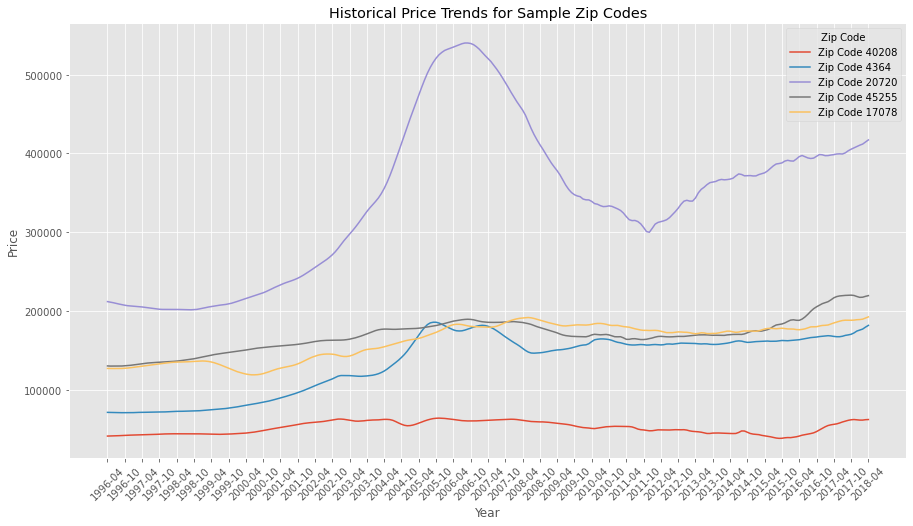

In [14]:
# Select a sample of zip codes for visualization
sample_zip_codes = df_cleaned['RegionName'].sample(5).values

# Set the index to RegionName for easier selection of rows by zip code
df_cleaned.set_index('RegionName', inplace=True)

# Extract time series data for the selected sample zip codes
sample_data = df_cleaned.loc[sample_zip_codes]

# Transpose the data to have dates as index
sample_data_transposed = sample_data.loc[:, '1996-04': '2018-04'].T

# Plot historical price trends for the selected zip codes
plt.figure(figsize=(15,8))
for zip_code in sample_data_transposed.columns:
    plt.plot(sample_data_transposed.index, sample_data_transposed[zip_code], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Historical Price Trends for Sample Zip Codes')
plt.legend(title='Zip Code')
# Adjust the x-axis
plt.xticks(rotation=45)
plt.xticks(ticks=sample_data_transposed.index[::6])

plt.grid(True)
plt.show()

Based on the historical price trends, we can observe that the prices generally increased over time, with a significant peak around 2006 followed by a sharp decline. After a period of fluctuation, the prices resumed an upward trend from 2012 onwards. This visualization provides valuable insights into the historical performance of the real estate market and can help inform future investment decisions.

# Modelling

In [15]:
# Feature Engineering
# Return RegionName to column
df_cleaned.reset_index(inplace=True)

df_cleaned.head()

,RegionName,RegionID,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,84654,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,90668,McKinney,TX,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,91982,Katy,TX,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,84616,Chicago,IL,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,93144,El Paso,TX,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [16]:
# Drop unnecessary columns
df_cleaned.drop(columns=['RegionID', 'City', 'State', 'SizeRank'], inplace=True)

In [17]:
print(df_cleaned.columns)

Index(['RegionName', 'CountyName', '1996-04', '1996-05', '1996-06', '1996-07',
       '1996-08', '1996-09', '1996-10', '1996-11',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=267)


In [18]:


# Adjust id_vars based on the actual column names
id_vars = ['RegionName', 'CountyName']

# Ensure all id_vars are present in df_cleaned
missing_vars = [var for var in id_vars if var not in df_cleaned.columns]
if missing_vars:
    raise KeyError(f"The following 'id_vars' are not present in the DataFrame: {missing_vars}")


# Reshape the data to have dates as index and zip codes as columns
df_reshaped = pd.melt(df_cleaned, id_vars= id_vars,
                      var_name='Year', value_name='Price')

# Convert the Year column to datetime
df_reshaped['Year'] = pd.to_datetime(df_reshaped['Year'], format='%Y-%m')

# Sort the data by 'RegionName' and 'Year'
df_reshaped = df_reshaped.sort_values(by=['RegionName', 'Year'])

# Calculate the ROI 
df_reshaped['ROI'] = df_reshaped.groupby('RegionName')['Price'].pct_change() * 100

# Drop rows with NaN ROI(First row for each zip code)
df_reshaped = df_reshaped.dropna(subset=['ROI'])

# Set the index to 'Year' for time series analysis
df_reshaped.set_index('Year', inplace=True)

# Display reorganized data
df_reshaped.head()

,RegionName,CountyName,Price,ROI
Year,,,,
1996-05-01,1001,Hampden,112800.0,-0.265252
1996-06-01,1001,Hampden,112600.0,-0.177305
1996-07-01,1001,Hampden,112300.0,-0.266430
1996-08-01,1001,Hampden,112100.0,-0.178094
1996-09-01,1001,Hampden,111900.0,-0.178412


### Check for Stationary using Augmented Dickey-Fuller Test

In [46]:
def adf_test(series, title=''):
    # Change the dataframes to series
    result = adfuller(series)

    print(f'ADF statistic for {title}: {result[0]}')
    print(f'p-value for {title}: {result[1]}')

    for key, value in result[4].items():
        print(f'Critical Values for {title}')
        print(f' {key}, {value}')
    return result[1]

# Sample multiple zip codes 
sample_zip_codes = df_reshaped['RegionName'].unique()[:10]

for zip_code in sample_zip_codes:
    time_series_data = df_reshaped[df_reshaped['RegionName'] == zip_code]['Price']
    time_series_data = pd.Series(time_series_data) # Ensure the data is a series
    p_value = adf_test(time_series_data, title=f'Zip Code {zip_code}')
    if p_value > 0.05:
        print(f'Time series for Zip Code {zip_code} is not stationary \n')
    else:
        print(f'Time series for Zip Code {zip_code} is stationary \n')

ADF statistic for Zip Code 1001: -1.8047469143749164
p-value for Zip Code 1001: 0.3781075421850556
Critical Values for Zip Code 1001
 1%, -3.456780859712
Critical Values for Zip Code 1001
 5%, -2.8731715065600003
Critical Values for Zip Code 1001
 10%, -2.572968544
Time series for Zip Code 1001 is not stationary 

ADF statistic for Zip Code 1002: -1.669631811668806
p-value for Zip Code 1002: 0.4468230621829077
Critical Values for Zip Code 1002
 1%, -3.4568881317725864
Critical Values for Zip Code 1002
 5%, -2.8732185133016057
Critical Values for Zip Code 1002
 10%, -2.5729936189738876
Time series for Zip Code 1002 is not stationary 

ADF statistic for Zip Code 1005: -2.1066198524105992
p-value for Zip Code 1005: 0.2418610709001014
Critical Values for Zip Code 1005
 1%, -3.457105309726321
Critical Values for Zip Code 1005
 5%, -2.873313676101283
Critical Values for Zip Code 1005
 10%, -2.5730443824681606
Time series for Zip Code 1005 is not stationary 

ADF statistic for Zip Code 1007: 

 Based on the ADF test results, we can see that the time series for the zip codes are not stationary thus we need to make them stationary. We can make the time series stationary by differencing the data. We can difference the data by subtracting the previous value from the current value. After that we can perform the ADF test again to check if the time series is stationary.

In [47]:
# Handle non-stationary time series
time_series_diff = time_series_data.diff().dropna()
p_value = adf_test(time_series_diff, title=f'Zip Code {zip_code} (Differenced)')
if p_value > 0.05:
    print(f'Time series for Zip Code {zip_code} is not stationary \n')
else:
    print(f'Time series for Zip Code {zip_code} is stationary \n')


ADF statistic for Zip Code 1026 (Differenced): -3.8955847039599707
p-value for Zip Code 1026 (Differenced): 0.002067582614198127
Critical Values for Zip Code 1026 (Differenced)
 1%, -3.4569962781990573
Critical Values for Zip Code 1026 (Differenced)
 5%, -2.8732659015936024
Critical Values for Zip Code 1026 (Differenced)
 10%, -2.573018897632674
Time series for Zip Code 1026 is stationary 



The ADF test results show that the time series for the zip codes are now stationary. We can build the ARIMA model using the stationary data. 

In [48]:
# Function to train ARIMA model
def train_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

In [49]:
# Function to evaluate model performance
def evaluate_model(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    return mae, rmse

In [50]:
# Split the data into training and testing sets
train_size = int(len(time_series_diff) * 0.8)
train, test = time_series_diff[0:train_size], time_series_diff[train_size:]

## Baseline ARIMA Model

In [51]:
# Train the ARIMA model
order = (5, 1, 0)
model_fit = train_arima_model(train, order)

In [52]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))[0]

In [53]:
# Evaluate model performance
mae, rmse = evaluate_model(test, predictions)


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  209
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1763.174
Method:                       css-mle   S.D. of innovations           1108.902
Date:                Fri, 26 Jul 2024   AIC                           3540.348
Time:                        13:19:30   BIC                           3563.744
Sample:                    07-01-1996   HQIC                          3549.807
                         - 11-01-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.8986     64.463     -0.185      0.854    -138.244     114.447
ar.L1.D.Price     0.9006      0.069     13.079      0.000       0.766       1.036
ar.L2.D.Price    -1.0203      0.090    -11.296      0.000      -1.197      -0.843
ar.L3.D.Price     0.4125      0.112      3.673      0.000       0.192       0.633
ar.L4.D.Price    -0.3758      0.092     -4.075      0.000      -0.557      -0.195
ar.L5.D.Price    -0.1171      0.072     -1.616      0.106      -0.259       0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7754           -0.7833j            1.1021           -0.1258
AR.2            0.7754           +0.7833j            1.1021            0.1258
AR.3           -0.1204           -1.2415j            1.2473           -0.2654
AR.4           -0.1204           +1.2415j            1.2473            0.2654
AR.5           -4.5202           -0.0000j            4.5202           -0.5000
-----------------------------------------------------------------------------
"""

Model Performance:
Mean Absolute Error: 3734.596522549559
Root Mean Squared Error: 4561.632371532783


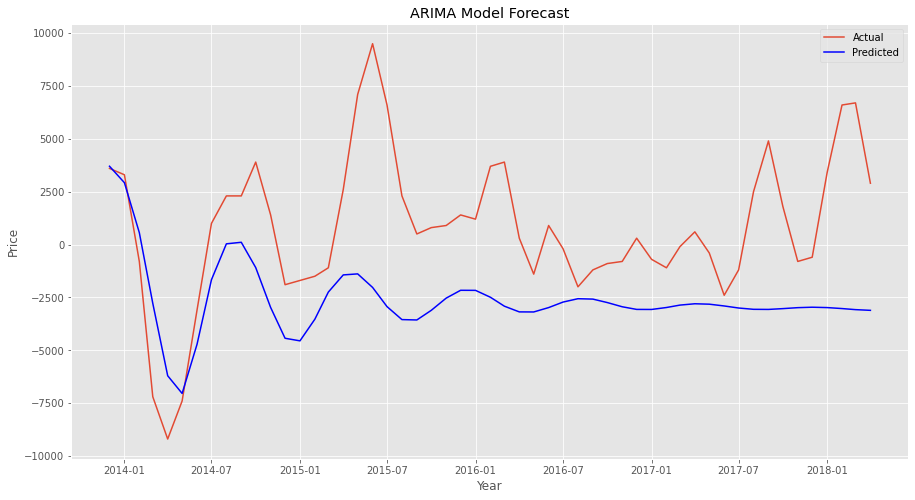

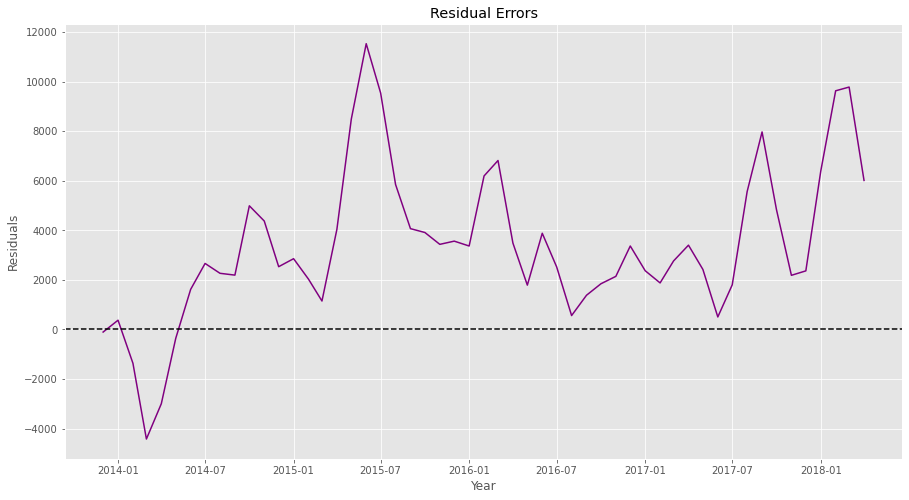

<Figure size 1080x576 with 0 Axes>

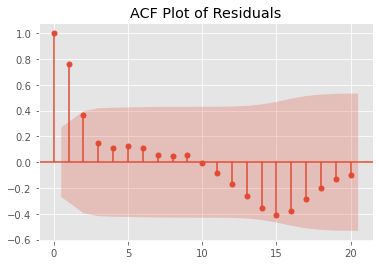

In [56]:
# Print out the model performance and plot the results
print(f'Model Performance:')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


# Plot actual vs predicted values
plt.figure(figsize=(15, 8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Plot residual errors
residuals = test - predictions

plt.figure(figsize=(15, 8))
plt.plot(test.index, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residual Errors')
plt.show()

# ACF plot of residuals
plt.figure(figsize=(15, 8))
plot_acf(residuals, lags=20)
plt.title('ACF Plot of Residuals')
plt.show()


# 